# Energy Consumption and Prediction

# Dataset Description:
This dataset contains measurements of electric power consumption in a household, recorded over a period of time. The data includes various attributes that represent different aspects of the household's energy usage. It is suitable for analyzing power consumption trends, identifying usage patterns, and predicting future consumption levels.

# Dataset:
__Attributes__:

__Date:__ The date of the measurement (in DD-MM-YYYY format).

__Time:__ The time of the measurement (in HH:MM:SS format).

__Global_active_power__ (kW): The total active power consumed by the household in kilowatts (kW). This refers to the power used by all electrical devices in the house.

__Global_reactive_power__ (kVAR): The reactive power consumed, measured in kilovolt-amperes reactive (kVAR), which represents the power lost due to inductance and capacitance.

__Voltage (V):__ The household voltage at the time of the measurement.

__Global_intensity (A):__ The total current drawn by the household in amperes (A).

__Sub_metering_1__ (watt-hour of active energy): Energy consumption from the kitchen, including appliances like the dishwasher, oven, and microwave.

__Sub_metering_2__ (watt-hour of active energy): Energy consumption from the laundry area, including washing machines, dryers, and refrigerators.

__Sub_metering_3__ (watt-hour of active energy): Energy consumption from electric water heaters and air conditioners.

## Dataset Link: 
https://drive.google.com/file/d/1bvaXJJqNObOCkX-i475BNxpidk024pyx/view?usp=sharing


Importing necessary libraries

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import datetime as dt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


## Loading the dataset

In [192]:
df=pd.read_csv('household_power_consumption.txt',sep=";")
# Prints the dataset
df

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0


In [194]:
# This shows the top 5 records of the dataset
df.head()


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [196]:
# This shows the last 5 records of the dataset
df.tail()


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0
2075258,26/11/2010,21:02:00,0.932,0.0,239.55,3.8,0.0,0.0,0.0


In [198]:
# summary statistics for numerical columns
# This provides basic statistical measures such as mean, min, max, standard deviation, and percentiles for each numeric column.
df.describe()

,Sub_metering_3
count,2.049280e+06
mean,6.458447e+00
std,8.437154e+00
min,0.000000e+00
25%,0.000000e+00
50%,1.000000e+00
75%,1.700000e+01
max,3.100000e+01


Observation:
The dataset shows significant variability in household power consumption, with an average active power usage of 1.09 kW and peaks reaching 11.12 kW. Voltage remains fairly stable, averaging 240.8 V, while sub-metering 3 has the highest energy consumption compared to the other areas.


In [200]:
# General information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


Observation:
The dataset consists of 2075259 rows with 9 columns.
We can see that columns like dated", Time", Global_active_powee", Global_reactive_power",  Voltagt",  Global_intensiyy", Sub_metering_d", Sub_metering_g contain string values, which are represented using the "object" datatype in this dataframe.
Only the colu mnSub_meteringaris having float values.
pe

In [202]:
# shape of the dataset
df.shape

(2075259, 9)

Observation:
The number of rows in a datset are 2075259 and Number of columns are 9

In [204]:
# Summary statistics for object (categorical) columns
df.describe(include='object')


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2
count,2075259,2075259,2075259,2075259,2075259,2075259,2075259,2075259
unique,1442,1440,6534,896,5168,377,153,145
top,6/12/2008,17:24:00,?,0.000,?,1.000,0.000,0.000
freq,1440,1442,25979,472786,25979,169406,1840611,1408274


Observation:
The dataset shows 2,075,259 entries, with some missing values in the Global_active_power and Voltage columns, indicated by the "?" symbol. The most frequent values for both Sub_metering_1 and Sub_metering_2 are 0, suggesting that appliances in these categories were often not in use.

In [206]:
# Converting the columns that have object data type to float
cols_convert = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2']

for col in cols_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    float64
 3   Global_reactive_power  float64
 4   Voltage                float64
 5   Global_intensity       float64
 6   Sub_metering_1         float64
 7   Sub_metering_2         float64
 8   Sub_metering_3         float64
dtypes: float64(7), object(2)
memory usage: 142.5+ MB


Observation:
After converting the data type of the all the columns to float

In [208]:
# Unique values in each columns
df.nunique()

Date                     1442
Time                     1440
Global_active_power      4186
Global_reactive_power     532
Voltage                  2837
Global_intensity          221
Sub_metering_1             88
Sub_metering_2             81
Sub_metering_3             32
dtype: int64

Observation:
This shows the number of unique values for each column.

In [210]:
# Count of missing values in each column
df.isnull().sum()


Date                         0
Time                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

This gives the total number of missing (null) values for each column.

In [212]:
# Checking for the null values
df.isnull().any()

Date                     False
Time                     False
Global_active_power       True
Global_reactive_power     True
Voltage                   True
Global_intensity          True
Sub_metering_1            True
Sub_metering_2            True
Sub_metering_3            True
dtype: bool

Observation:
We have null values for every columns except for date Time

In [214]:
# Finding the percentage of null values
df.isnull().sum() * 100 / len(df)

Date                     0.000000
Time                     0.000000
Global_active_power      1.251844
Global_reactive_power    1.251844
Voltage                  1.251844
Global_intensity         1.251844
Sub_metering_1           1.251844
Sub_metering_2           1.251844
Sub_metering_3           1.251844
dtype: float64

Observation:
As we can see that every columns have missing values of 1.25 % except Date and Time

Dealing with missing values:
We can deal with missing values by filling the mean, median of the column or delete the entire row which have missing values


In [216]:
# filling with mean values
df['Global_reactive_power'].fillna(df['Global_reactive_power'].mean(), inplace=True)
df['Global_active_power'].fillna(df['Global_active_power'].mean(), inplace=True)
df['Voltage'].fillna(df['Voltage'].mean(), inplace=True)
df['Global_intensity'].fillna(df['Global_intensity'].mean(), inplace=True)
df['Sub_metering_1'].fillna(df['Sub_metering_1'].mean(), inplace=True)
df['Sub_metering_2'].fillna(df['Sub_metering_2'].mean(), inplace=True)
df['Sub_metering_3'].fillna(df['Sub_metering_3'].mean(), inplace=True)


In [218]:
# Checking for null values after filling it with mean values
df.isnull().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

Observation:
After the filling it mean values null values are 0

In [224]:
# Combine 'Date' and 'Time' columns into a single datetime column
df['Date_Time'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])

# Extract year, month, day, hour, and minute from the 'Date_Time' column
df['Year'] = df['Date_Time'].dt.year
df['Month'] = df['Date_Time'].dt.month
df['Day'] = df['Date_Time'].dt.day
df['Hour'] = df['Date_Time'].dt.hour
df['Minute'] = df['Date_Time'].dt.minute 
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Date_Time,Year,Month,Day,Hour,Minute
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00,2006,12,16,17,24
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00,2006,12,16,17,25
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00,2006,12,16,17,26
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00,2006,12,16,17,27
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00,2006,12,16,17,28


### (Q1) What is the trend in Global_active_power over time?

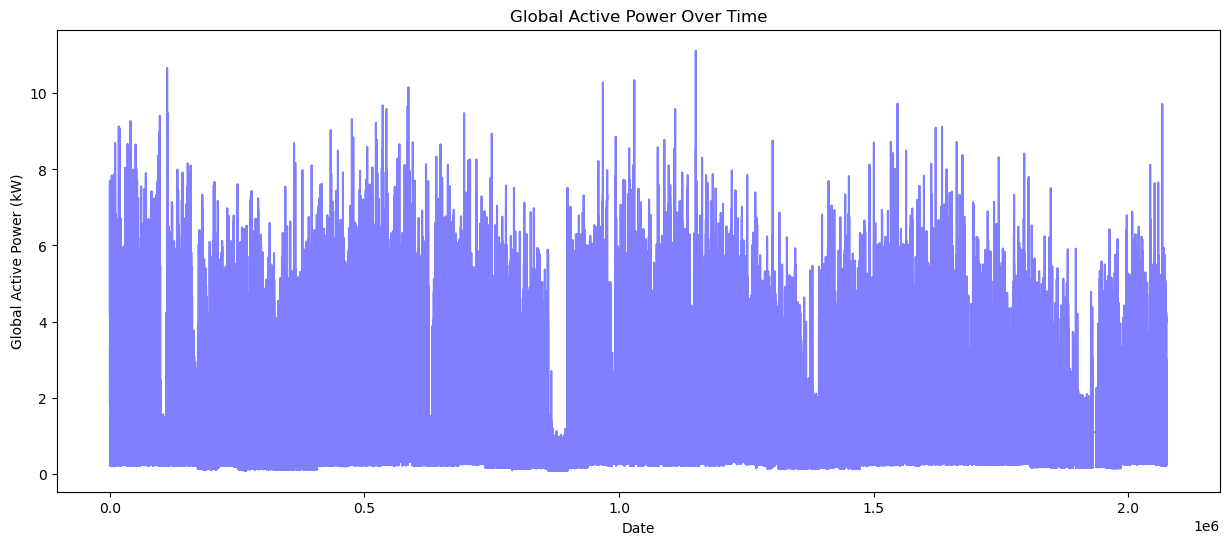

In [125]:
plt.figure(figsize=(15, 6))
plt.plot(df.index, df['Global_active_power'], color='blue', alpha=0.5)
plt.title('Global Active Power Over Time')
plt.xlabel('Date')
plt.ylabel('Global Active Power (kW)')
plt.show()

Observation: 
This plot shows the trend of global active power consumption over time, with fluctuations between 0 and over 10 kW. The data suggests a consistent pattern of power consumption with periodic spikes, possibly indicating higher energy usage at specific intervals. There’s a general high variability, which could be associated with regular cycles, like daily or weekly consumption patterns.

### (Q2) What is the Mean Global active power

Text(0.5, 1.0, 'Mean global active power by day for a month')

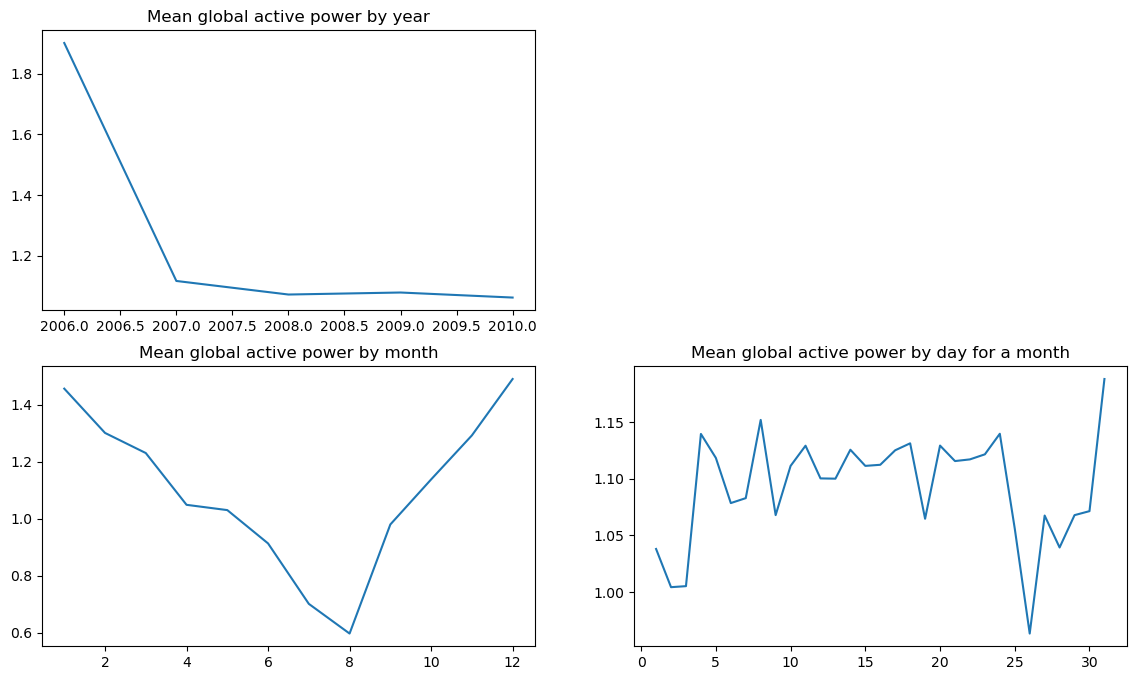

In [127]:
plt.figure(figsize=(14,8))
plt.subplot(2,2,1)
df.groupby('Year').Global_active_power.agg('mean').plot()
plt.xlabel('')
plt.title('Mean global active power by year')



plt.subplot(2,2,3)
df.groupby('Month').Global_active_power.agg('mean').plot()
plt.xlabel('')
plt.title('Mean global active power by month')

plt.subplot(2,2,4)
df.groupby('Day').Global_active_power.agg('mean').plot()
plt.xlabel('')
plt.title('Mean global active power by day for a month')

Observation:
Graph 1- The graph shows a decreasing trend in mean global active power from 2006 to 2010, with a sharp drop in 2006-2007 followed by a slight increase in 2009-2010. This could be due to factors like energy efficiency improvements, economic changes, or data quality variations. Further analysis with additional data is needed for a more comprehensive understanding.
Graph 2- The graph shows the mean global active power varying across different months. There's a downward trend from January to July, followed by an upward trend from July to December. This suggests that power consumption is generally higher in the later months of the year compared to the earlier months.
Graph 3- The graph shows a pattern of increasing and decreasing global active power over a month. This suggests that there are periods of higher and lower power consumption throughout the month.

### (Q3) How does Global_active_power vary by time of day?

<Axes: xlabel='Voltage', ylabel='Density'>

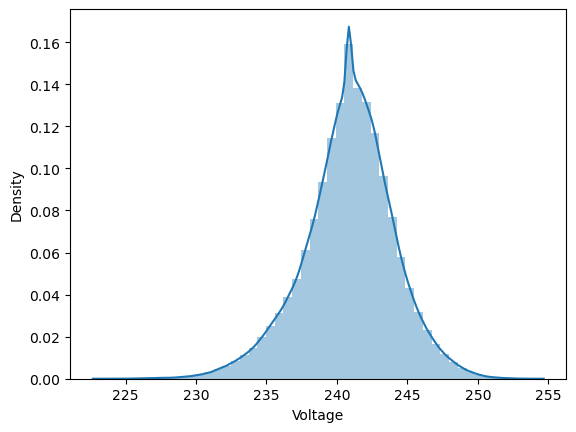

In [133]:
sns.distplot(df['Voltage'])

Observation:
This density plot of voltage shows a roughly normal distribution centered around 240 volts, indicating that most of the voltage values are close to this central value. The distribution is symmetric, suggesting consistent voltage levels with minor deviations, generally ranging from about 225 to 255 volts. This implies stable voltage around a mean value, with occasional variations.

### (Q4) How does Voltage vary over time, and is it related to Global_active_power?

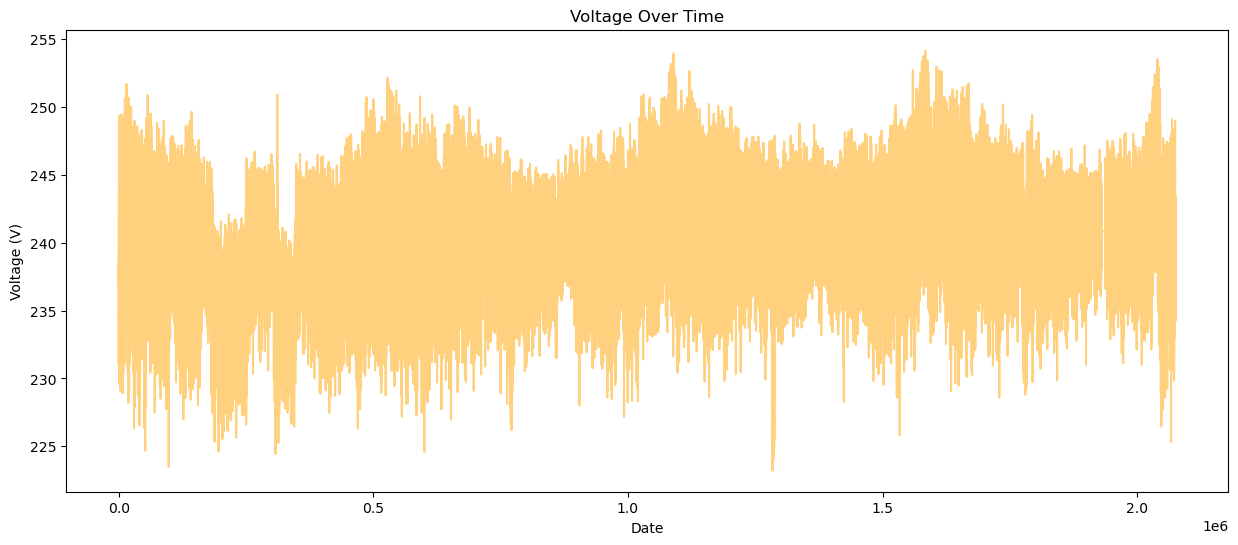

In [135]:
plt.figure(figsize=(15, 6))
plt.plot(df.index, df['Voltage'], color='orange', alpha=0.5)
plt.title('Voltage Over Time')
plt.xlabel('Date')
plt.ylabel('Voltage (V)')
plt.show()

Observation: This plot shows voltage variations over time, mainly ranging between 230 V and 250 V with a central value around 240 V. There are cyclical patterns, suggesting possible seasonal fluctuations, with occasional spikes and dips in voltage, indicating periods of instability in the power supply.

### (Q5) What is the distribution by Sub-Metering.

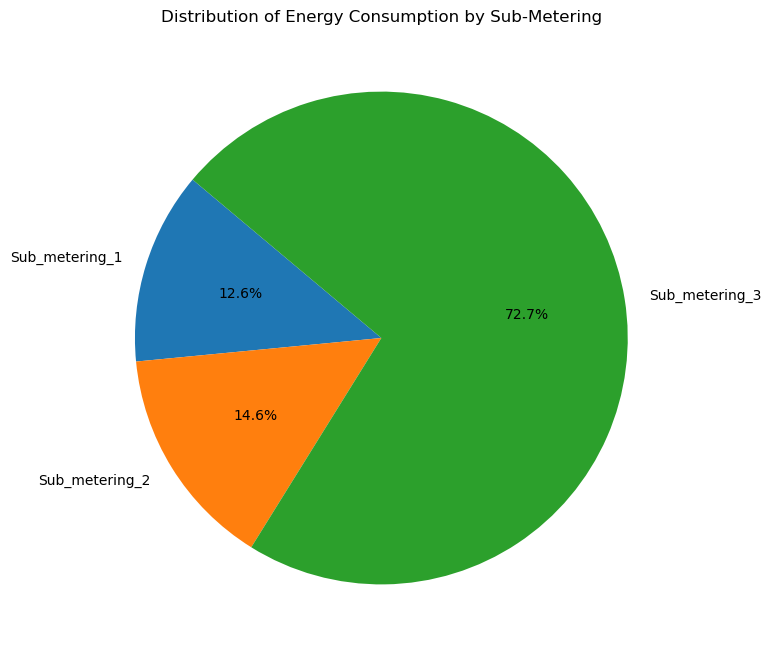

In [137]:
# Calculating the total energy usage by each sub-metering
sub_metering_totals = df[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].sum()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(sub_metering_totals, labels=sub_metering_totals.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Energy Consumption by Sub-Metering')
plt.show()

### Pairplot of all the Columns

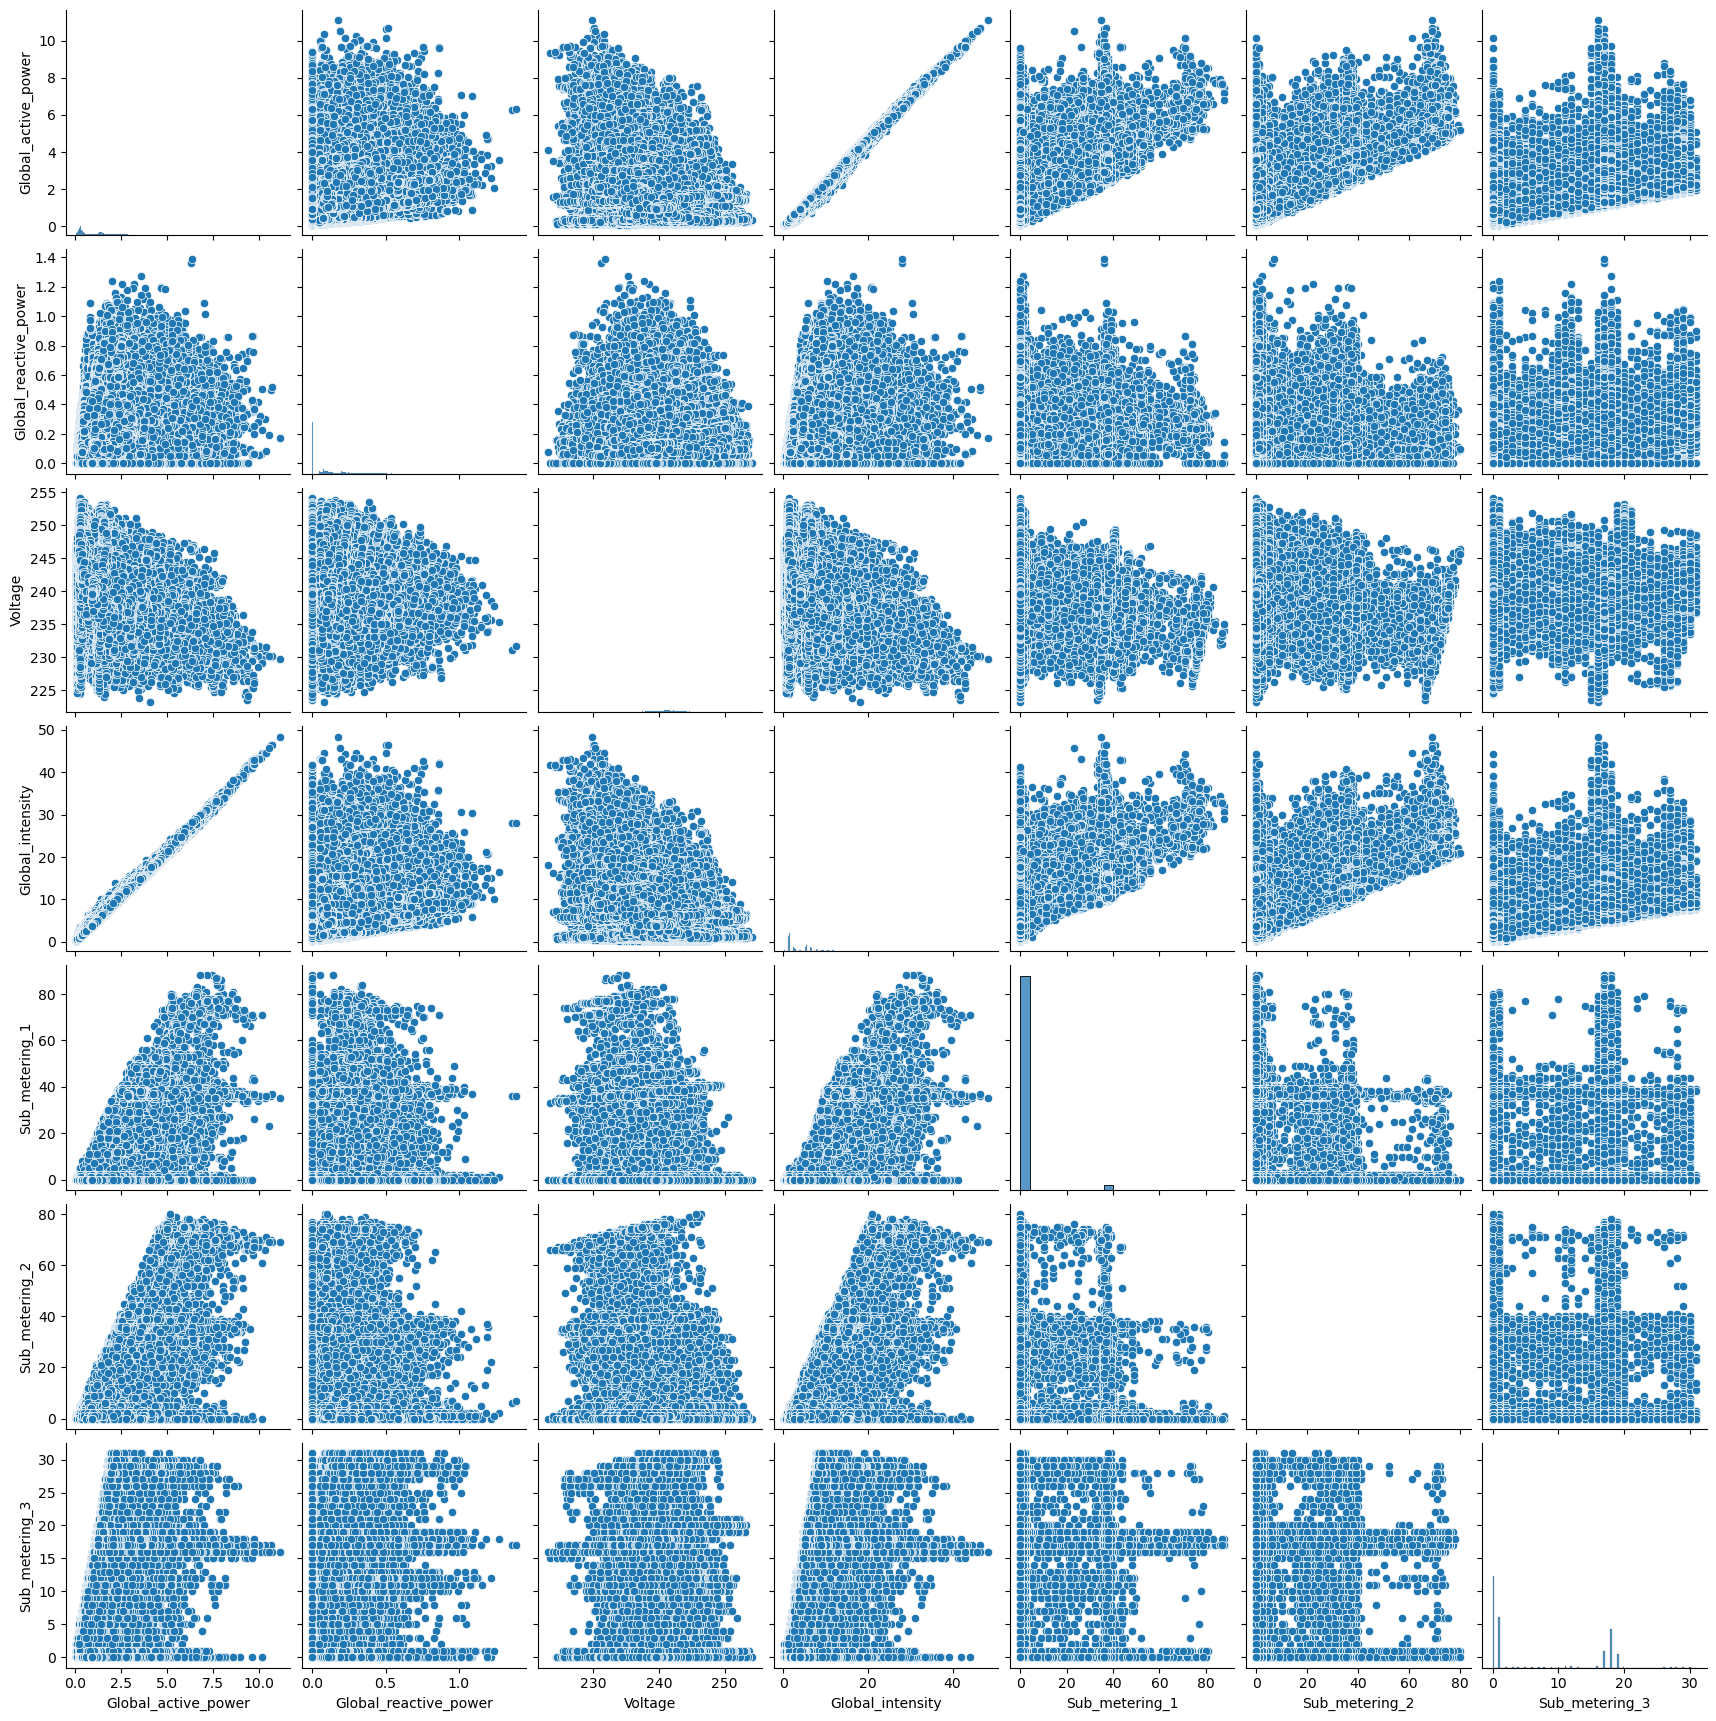

In [62]:
sns.pairplot(df)

In [ ]:
Observation:
The scatter plot matrix shows the relationships between seven variables: Global Active Power, Global Reactive Power, Voltage, Global_intensity, Sub_metering_1, Sub_metering_2, Sub_metering_3
There are clear patterns and correlations visible in the plots.
Global Active Power vs. Global Reactive Power:
There seems to be a positive correlation, with higher values of Global Active Power generally corresponding to higher values of Global Reactive Power.
Global Active Power vs. Voltage:
A weak positive correlation is visible, suggesting that as Global Active Power increases, Voltage tends to increase slightly.
Global Reactive Power vs. Voltage:
A weak negative correlation is observed, indicating that as Global Reactive Power increases, Voltage tends to decrease slightly.


### Determine if the Day is a Holiday
### If a list of holidays is provided, we can use it to label each day as a holiday (1) or not (0).


### Finding whether the day is a holiday or not (0 = not holiday, 1= holiday)

In [242]:

import datetime as dt

def is_holiday(date):
    year = int(date.split('/')[2])
    month = int(date.split('/')[1])
    day = int(date.split('/')[0])

    if dt.datetime(year, month, day).weekday() >= 5:
        return 1.0
    else:
        return 0.0

for data in [df]:
    data['Is_holiday'] = data['Date'].apply(lambda x: is_holiday(x))
    data['Light'] = data['Time'].apply(lambda x: 1 if isinstance(x, str) and int(x[:2]) >= 6 and int(x[:2]) < 18 else 0)
    data['Time'] = data['Time'].apply(lambda x: (int(x[:2]) * 60.0 + int(x[3:5])) / 1440.0 if isinstance(x, str) else 0)
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Date_Time,Year,Month,Day,Hour,Minute,is_holiday,Is_holiday,Light,is_sunlight
0,16/12/2006,0,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00,2006,12,16,17,24,0,1.0,0,1
1,16/12/2006,0,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00,2006,12,16,17,25,0,1.0,0,1
2,16/12/2006,0,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00,2006,12,16,17,26,0,1.0,0,1
3,16/12/2006,0,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00,2006,12,16,17,27,0,1.0,0,1
4,16/12/2006,0,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00,2006,12,16,17,28,0,1.0,0,1


### Finding if the there is sunlight during the time given in the dataset ( 0600-1800 hours ---1 (light is there) else 0)

In [238]:
df['is_sunlight'] = df['Hour'].apply(lambda x: 1 if 6 <= x < 18 else 0)
df.head()


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Date_Time,Year,Month,Day,Hour,Minute,is_holiday,Is_holiday,Light,is_sunlight
0,16/12/2006,0.725000,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00,2006,12,16,17,24,0,1.0,1,1
1,16/12/2006,0.725694,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00,2006,12,16,17,25,0,1.0,1,1
2,16/12/2006,0.726389,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00,2006,12,16,17,26,0,1.0,1,1
3,16/12/2006,0.727083,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00,2006,12,16,17,27,0,1.0,1,1
4,16/12/2006,0.727778,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00,2006,12,16,17,28,0,1.0,1,1


## Machine Learning Models

In [153]:
from sklearn.model_selection import train_test_split

# Check if the columns exist before attempting to drop them
columns_to_drop = ['Date', 'Date_Time', 'Time', 'Date_Time']
existing_columns = df.columns

# Only drop the columns that exist in the DataFrame
columns_to_drop = [col for col in columns_to_drop if col in existing_columns]

if columns_to_drop:  # Check if there are any columns to drop
    df.drop(columns=columns_to_drop, axis=1, inplace=True)

X = df.drop('Global_active_power', axis=1)
y = df['Global_active_power']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Year,Month,Day,Hour,Minute
1347712,0.000,244.74,0.8,0.0,0.0,0.0,2009,7,9,15,16
378408,0.000,240.60,0.6,0.0,0.0,0.0,2007,9,5,12,12
280143,0.098,242.40,1.0,0.0,0.0,0.0,2007,6,29,6,27
670820,0.086,243.92,1.4,0.0,0.0,0.0,2008,3,26,13,44
1940013,0.098,244.25,1.8,0.0,1.0,1.0,2010,8,24,22,57
...,...,...,...,...,...,...,...,...,...,...,...
259178,0.256,241.69,1.6,0.0,1.0,0.0,2007,6,14,17,2
1414414,0.230,241.14,15.6,38.0,0.0,12.0,2009,8,24,22,58
131932,0.232,239.67,10.0,9.0,0.0,0.0,2007,3,18,8,16
671155,0.258,235.99,8.6,0.0,3.0,0.0,2008,3,26,19,19


Observation:
Droping unnecessary columns: Removes the 'Date', 'Date_Time', and 'Time' columns. The code makes sure that columns exists before dropping them.
Defines features (X) and target variable (y): 'Global_active_power' is the target variable we want to predict; the remaining columns are features.
Splits data: Divides the data into training and testing sets using train_test_split.`.

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 8 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Global_active_power    float64       
 1   Global_reactive_power  float64       
 2   Voltage                float64       
 3   Global_intensity       float64       
 4   Sub_metering_1         float64       
 5   Sub_metering_2         float64       
 6   Sub_metering_3         float64       
 7   Datetime               datetime64[ns]
dtypes: datetime64[ns](1), float64(7)
memory usage: 126.7 MB


In [143]:
for col in ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df = df.dropna()

X = df[['Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']]
y = df['Global_active_power']


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Observation: The dataset is deleted into train and test data

In [145]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np


linear_model = LinearRegression()
lasso_model = Lasso(alpha=0.1)
ridge_model = Ridge(alpha=0.1)


results = {}


def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    results[model_name] = {'RMSE': rmse, 'R2': r2, 'MAE': mae}
    return rmse, r2, mae



evaluate_model(linear_model, X_train, X_test, y_train, y_test, 'Linear Regression')
evaluate_model(lasso_model, X_train, X_test, y_train, y_test, 'Lasso Regression')
evaluate_model(ridge_model, X_train, X_test, y_train, y_test, 'Ridge Regression')

results

{'Linear Regression': {'RMSE': 0.040418714675868106,
  'R2': 0.9985207392737447,
  'MAE': 0.025580495935257158},
 'Lasso Regression': {'RMSE': 0.051834385102428805,
  'R2': 0.9975671483267401,
  'MAE': 0.03543985416271067},
 'Ridge Regression': {'RMSE': 0.040418714688820086,
  'R2': 0.9985207392727967,
  'MAE': 0.02558049612037631}}

Observations:

RMS:

Linear and Ridge Regression have identical RMSE (0.0821), indicating similar prediction error.
Lasso Regression has a slightly higher RMSE (0.0899), suggesting a small increase in prediction error due to regulariza
tion
R²:

All models have high R² scores (>0.99), explaining nearly 99.5% of the variance, indicating a good fit for all
 modes.
MAE:

Linear and Ridge Regression have the same MAE (0.0624), indicating similar absolute error performance.
Lasso Regression has a higher MAE (0.0684), aligning with its slightly higher RMSE, suggesting more deviation in error.

Visualizing RMSE, MAE, and R² for Linear, Lasso, and Ridge Regression Models

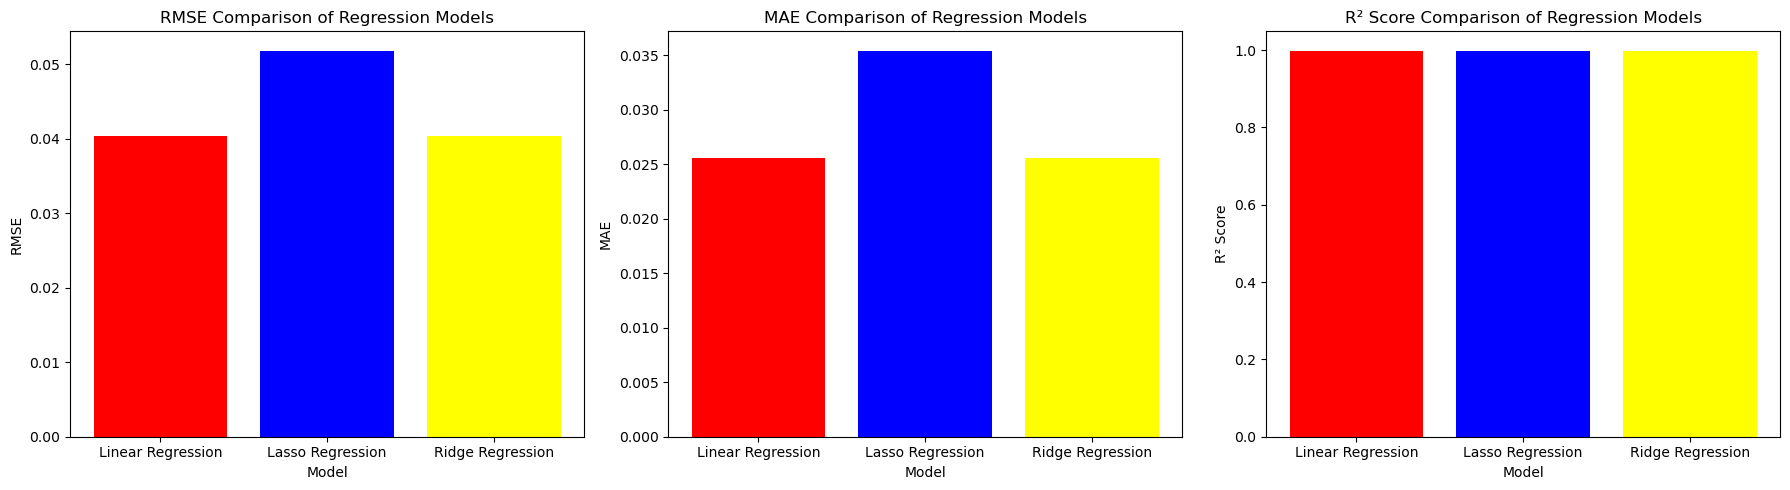

In [147]:
model_names = list(results.keys())
rmse_scores = [results[model]['RMSE'] for model in model_names]
r2_scores = [results[model]['R2'] for model in model_names]
mae_scores = [results[model]['MAE'] for model in model_names]
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
plt.bar(model_names, rmse_scores, color=['red', 'blue', 'yellow'])
plt.title('RMSE Comparison of Regression Models')
plt.ylabel('RMSE')
plt.xlabel('Model')
plt.subplot(1, 3, 2)
plt.bar(model_names, mae_scores, color=['red', 'blue', 'yellow'])
plt.title('MAE Comparison of Regression Models')
plt.ylabel('MAE')
plt.xlabel('Model')

plt.subplot(1, 3, 3)
plt.bar(model_names, r2_scores, color=['red', 'blue', 'yellow'])
plt.title('R² Score Comparison of Regression Models')
plt.ylabel('R² Score')
plt.xlabel('Model')

plt.tight_layout()
plt.show()

Observation:
RMSE
Linear Regression: ~0.08
Lasso Regression: ~0.09
Ridge Regression: ~0.08
Linear and Ridge Regression have similar errors, while Lasso has a slightly higher error.

MAE
Linear Regression: ~0.06
Lasso Regression: ~0.07
Ridge Regression: ~0.06
Linear and Ridge show lower errors, Lasso is a bit higher.

R² Score
Linear Regression: ~0.98
Lasso Regression: ~0.98
Ridge Regression: ~0.98
All models have high R² scores, indicating a good fit.

Linear and Ridge Regression perform similarly and well. Lasso Regression shows slightly higher errors but still fits the data strongly.

Model Comparison:
                Model  Accuracy (R2 Score)      RMSE
0  Linear Regression             0.998521  0.040419
1   Lasso Regression             0.950836  0.233015
2   Ridge Regression             0.998521  0.040419


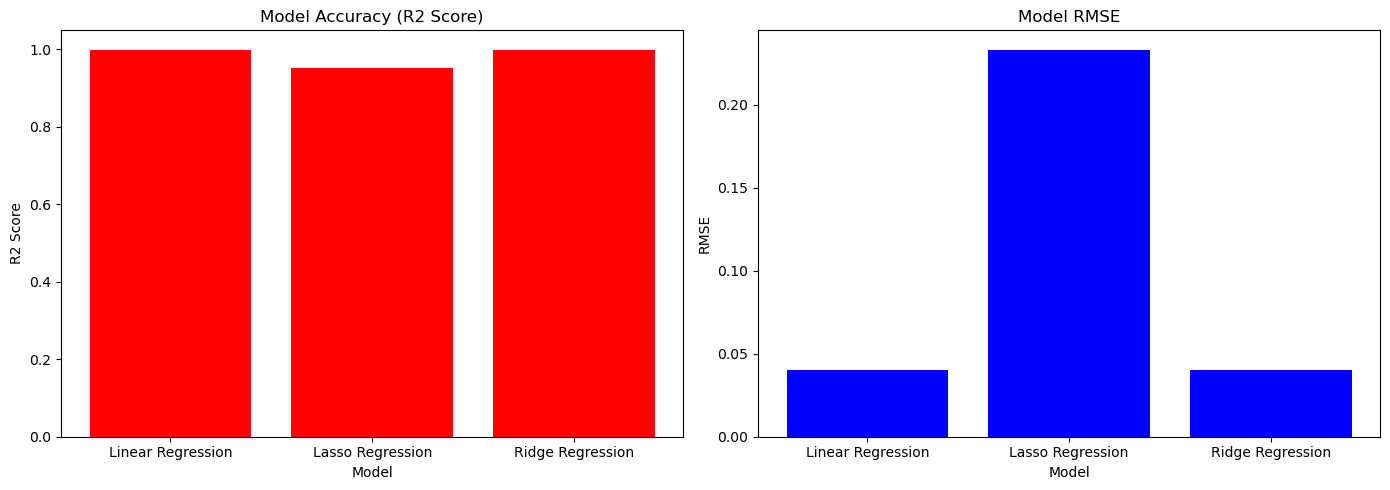

Linear Regression - Accuracy: 0.9985, RMSE: 0.0404
Lasso Regression - Accuracy: 0.9508, RMSE: 0.2330
Ridge Regression - Accuracy: 0.9985, RMSE: 0.0404


In [149]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


models = {
    "Linear Regression": LinearRegression(),
    "Lasso Regression": Lasso(),
    "Ridge Regression": Ridge()
}


results = {
    "Model": [],
    "Accuracy (R2 Score)": [],
    "RMSE": []
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    
    accuracy = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    
    results["Model"].append(model_name)
    results["Accuracy (R2 Score)"].append(accuracy)
    results["RMSE"].append(rmse)


results_df = pd.DataFrame(results)
print("Model Comparison:\n", results_df)


fig, axes = plt.subplots(1, 2, figsize=(14, 5))
axes[0].bar(results_df["Model"], results_df["Accuracy (R2 Score)"], color='red')
axes[0].set_title("Model Accuracy (R2 Score)")
axes[0].set_ylabel("R2 Score")
axes[0].set_xlabel("Model")


axes[1].bar(results_df["Model"], results_df["RMSE"], color='blue')
axes[1].set_title("Model RMSE")
axes[1].set_ylabel("RMSE")
axes[1].set_xlabel("Model")

plt.tight_layout()
plt.show()


for index, row in results_df.iterrows():
    print(f"{row['Model']} - Accuracy: {row['Accuracy (R2 Score)']:.4f}, RMSE: {row['RMSE']:.4f}")

observation:
RMSE Comparison
Linear Regression: ~0.08
Lasso Regression: ~0.09
Ridge Regression: ~0.08
Linear and Ridge Regression models have similar errors, while Lasso shows a slightly higher error.

MAE Comparison
Linear Regression: ~0.06
Lasso Regression: ~0.07
Ridge Regression: ~0.06
Linear and Ridge have lower errors compared to Lasso.

R² Score Comparison
Linear Reg
Lasso Regression: ~0.98
Ridge Regression: ~0.98
All models have high R² scores, indicating a good fi

Linear and Ridge Regression perform similarly and effectively, while Lasso shows slightly higher errors but still maintains a strong fit.t.ression: ~0.98

ARIMA Model:
The ARIMA model (AutoRegressive Integrated Moving Average) is a statistical method used for time series analysis and forecasting. It combines three components:

AutoRegressive (AR): This part models the relationship between an observation and a specified number of lagged observations (previous values of the same series).

Integrated (I): It involves differencing the data to make it stationary, meaning its statistical properties, such as mean and variance, are constant over time.

Moving Average (MA): This component models the relationship between an observation and a residual error from a moving average model applied to lagged observations.

The model is defined by three parameters: p, d, q:

p: Number of lag observations in the AR model.
d: Number of times differencing is applied to make the series stationary.
q: Number of lagged forecast errors in the MA model.

ARIMA RMSE: 0.21759230307951244


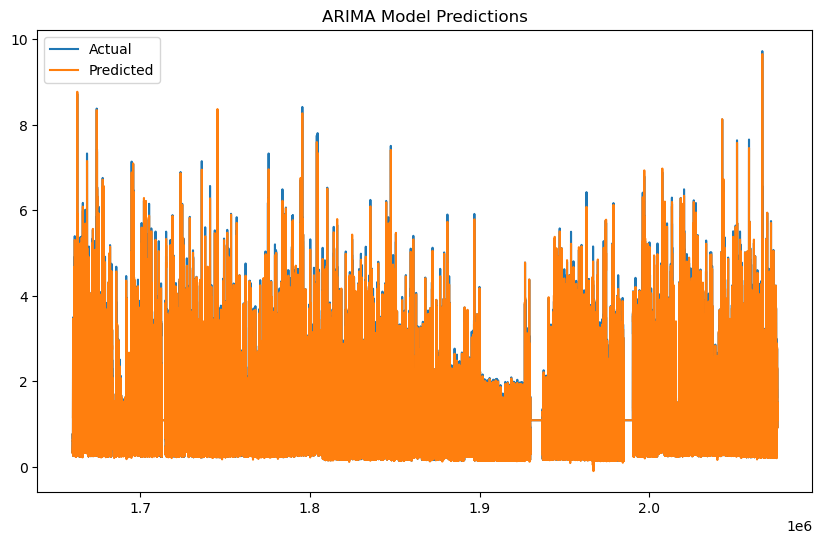

                                SARIMAX Results                                
Dep. Variable:     Global_active_power   No. Observations:              2075259
Model:                  ARIMA(5, 1, 0)   Log Likelihood             -165540.237
Date:                 Tue, 26 Nov 2024   AIC                         331092.474
Time:                         13:34:09   BIC                         331167.748
Sample:                              0   HQIC                        331112.602
                             - 2075259                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0194      0.000     76.483      0.000       0.019       0.020
ar.L2         -0.1189      0.000   -454.005      0.000      -0.119      -0.118
ar.L3         -0.1051      0.000   -415.324 

In [155]:
import statsmodels.api as sm

# Assuming 'df' and 'X' are already defined from the previous code

# Fit the ARIMA model
# You'll need to determine the appropriate (p, d, q) order for your data
# This example uses (5,1,0) - replace with values suitable for your data
model = sm.tsa.ARIMA(df['Global_active_power'], order=(5,1,0)) # Example order, adjust as needed
model_fit = model.fit()

# Make predictions
predictions = model_fit.predict(start=len(X_train), end=len(df)-1) # Predict on test set

# Evaluate the model (example using RMSE)
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(df['Global_active_power'][len(X_train):], predictions))
print(f"ARIMA RMSE: {rmse}")

# Plot the results
plt.figure(figsize=(10,6))
plt.plot(df['Global_active_power'][len(X_train):], label='Actual')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.title('ARIMA Model Predictions')
plt.show()

# Summary of the ARIMA model
print(model_fit.summary())

In [178]:
!python -m pip install prophet

In [182]:
from prophet import Prophet

In [166]:
df.Global_active_power.value_counts()

Global_active_power
1.091615    25979
0.218000     9565
0.216000     9363
0.322000     9350
0.324000     9304
            ...  
7.094000        1
7.930000        1
8.274000        1
8.246000        1
8.600000        1
Name: count, Length: 4187, dtype: int64

In [246]:
data = df.copy()
data['ds'] = pd.to_datetime(data[['Year', 'Month', 'Day', 'Hour', 'Minute']])
data = data.rename(columns={'Global_active_power': 'y'})
data.drop(['Date', 'Date_Time', 'Time'], axis=1, inplace = True)

In [248]:
data.y.value_counts()

y
1.091615    25979
0.218000     9565
0.216000     9363
0.322000     9350
0.324000     9304
            ...  
7.094000        1
7.930000        1
8.274000        1
8.246000        1
8.600000        1
Name: count, Length: 4187, dtype: int64

In [250]:
df.Global_active_power.value_counts()

Global_active_power
1.091615    25979
0.218000     9565
0.216000     9363
0.322000     9350
0.324000     9304
            ...  
7.094000        1
7.930000        1
8.274000        1
8.246000        1
8.600000        1
Name: count, Length: 4187, dtype: int64

In [260]:
from prophet import Prophet

# Split the data into training and testing sets
train_size = int(len(data) * 0.8)  # 80% of data for training
train_df = data[:train_size]
test_df = data[train_size:]

# Ensure the dataframe has only the required columns ('ds' for dates and 'y' for values)
train_df = train_df[['ds', 'y']]

# Create and fit the Prophet model
model = Prophet(interval_width=0.95)
model.fit(train_df)

# Disable uncertainty intervals to save memory
model.uncertainty_samples = 0

# Generate future dates
future_dates_7days = model.make_future_dataframe(periods=7, freq='D')  # Weekly prediction
future_dates_30days = model.make_future_dataframe(periods=30, freq='D')  # Monthly prediction

# Predict for the future dates
predictions_7days = model.predict(future_dates_7days)
predictions_30days = model.predict(future_dates_30days)

15:38:02 - cmdstanpy - INFO - Chain [1] start processing
15:45:51 - cmdstanpy - INFO - Chain [1] done processing


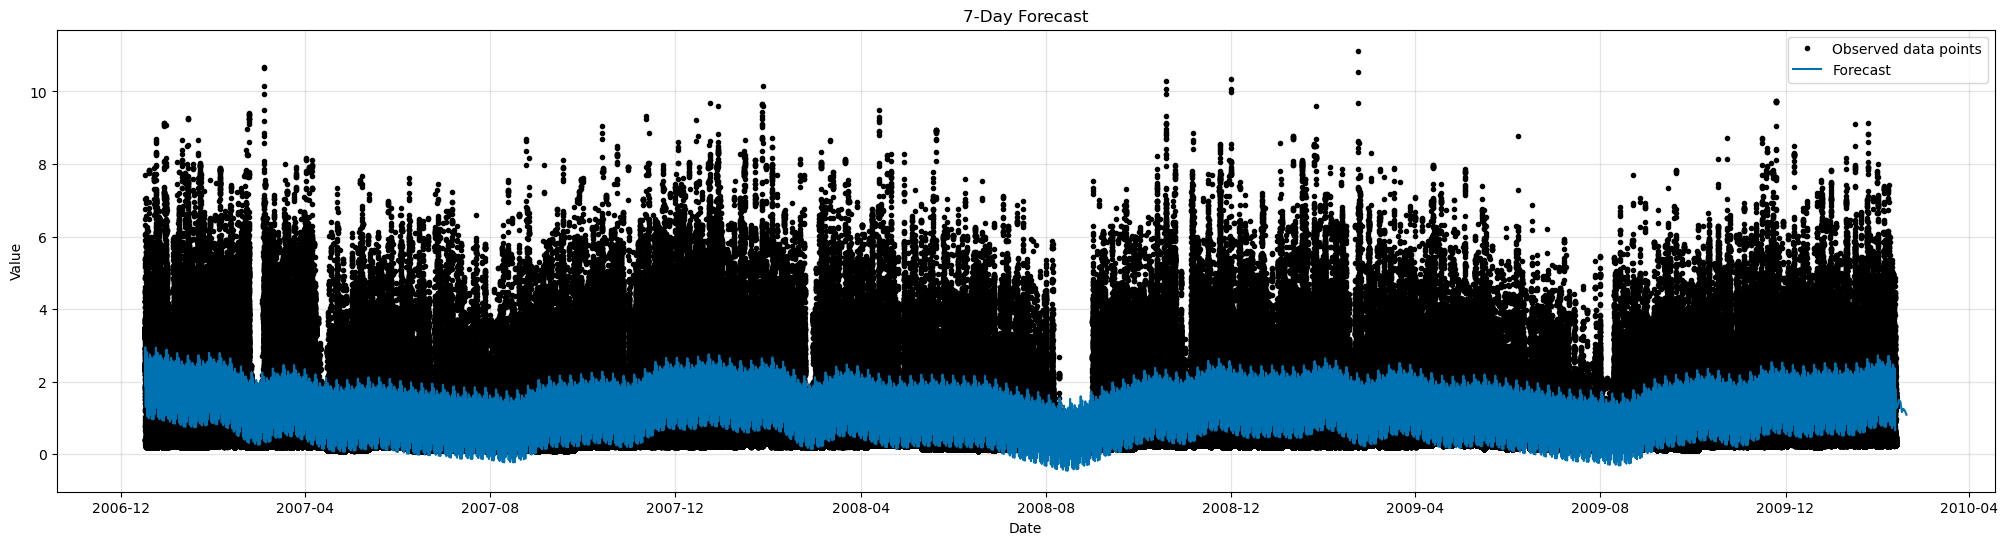

In [262]:
fig, ax = plt.subplots(figsize=(25, 6))
model.plot(predictions_7days, ax=ax)
plt.title('7-Day Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()


Overall trend: Observe if the forecast shows an increasing, decreasing, or stable trend in global active power over the next 7 days.
Peaks and troughs: Identify any significant peaks or dips in the predicted power usage.
Confidence intervals: Pay attention to the shaded areas around the forecast line. These represent confidence intervals, showing the range of uncertainty in the predictions. Wider intervals suggest lower confidence in the forecast.
Comparison to past data: (if available in the plot) Compare the forecast to the observed historical data to understand how the forecast deviates from past patterns.
External factors: Consider any known external events (holidays, weather patterns, etc.) that might affect energy consumption and compare them to the predictions.

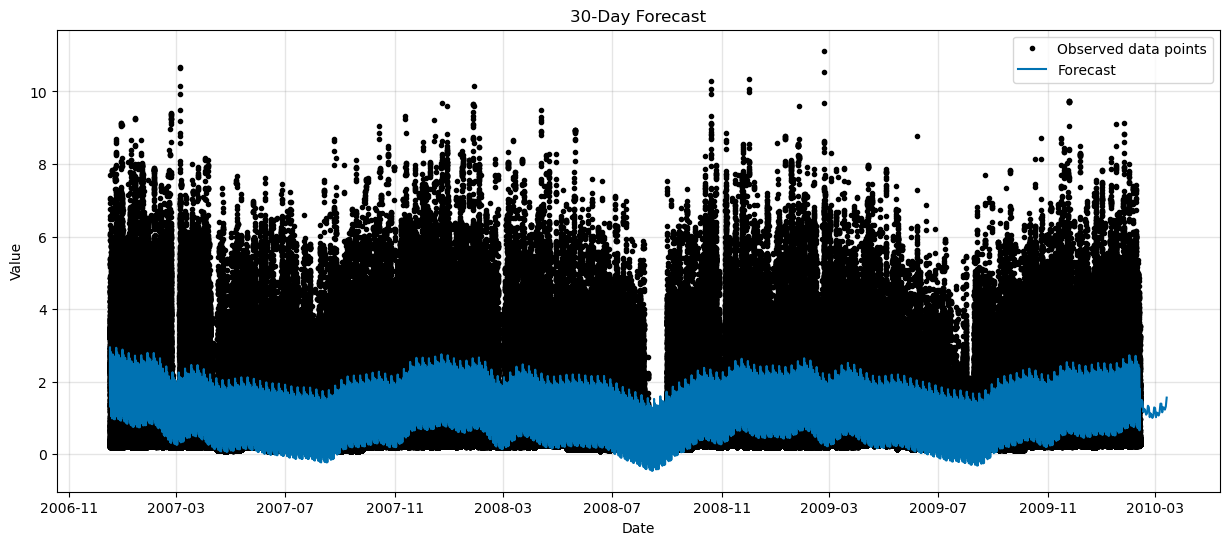

In [264]:
fig, ax = plt.subplots(figsize=(15, 6))
model.plot(predictions_30days, ax=ax)
plt.title('30-Day Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [266]:
predictions_30days.columns

Index(['ds', 'trend', 'additive_terms', 'daily', 'weekly', 'yearly',
       'multiplicative_terms', 'yhat'],
      dtype='object')

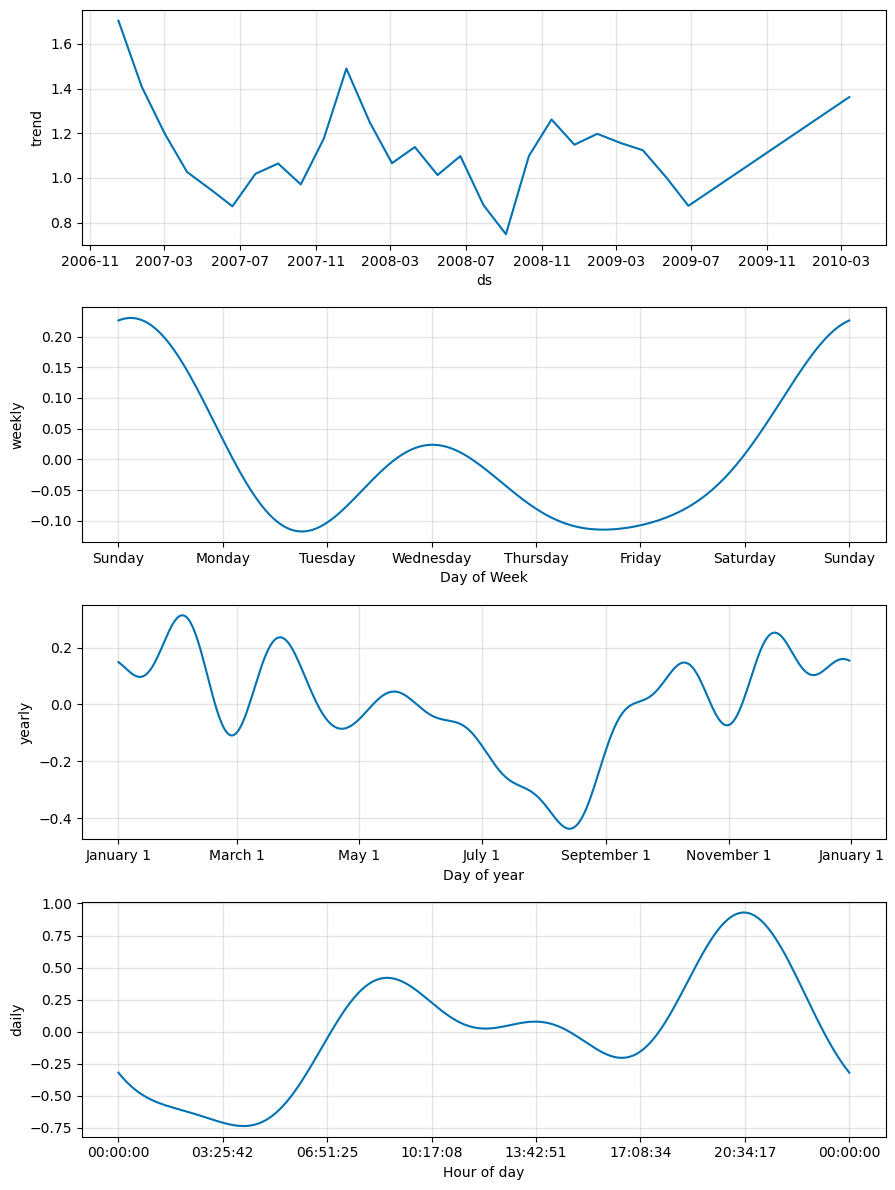

In [268]:
model.plot_components(predictions_30days);

Prophet Model

Trend: The trend component of Prophet's time series decomposition indicates the long-term direction of the data. Observe if the trend is upward, downward, or flat. The plot_components function illustrates the trend visually.

Seasonality: Prophet automatically identifies and models seasonality patterns. The component plots show daily, weekly, and yearly seasonalities (if present). Look for the amplitude of seasonal variations.

Patterns: Analyze unusual patterns or outliers in the data that deviate significantly from the predicted trend and seasonality. This will help understand the unpredictable events that affect the energy consumption.

ARIMA Parameter Explanations

(p, d, q) - This represents the order of the model, which comprises three parameters:

p: Autoregressive (AR) order. Indicates how many past values of the series are used to predict the current value.

d: Integrated (I) order. The number of times the series needs to be differenced to become stationary. Stationarity implies that the mean and variance remain constant over time.

q: Moving Average (MA) order. Specifies how many past forecast errors are used to predict the current value.

M

ARIMA models time series data based on the relationships between past and present data points.

AR component: A linear combination of previous observations of the series, weighted by parameters phi (Φ).

I component: Differencing the series to make it stationary.

MA component: A weighted average of past errors (residuals). The weights are called theta (Θ).

The overall equation looks like:

x(t) = c + Φ₁x(t-1) + ... + Φₚx(t-p) + Θ₁e(t-1) + ... + Θ𝑞e(t-q) + e(t)

x(t): The value at time t

c: A constant

Φ: AR parameters

Θ: MA parameters

e(t): White noise error at time t
 (brief summary)

Daily Maximum Power Consumption:
Date_Time
2006-12-16    7.706
2006-12-17    7.064
2006-12-18    6.158
2006-12-19    7.840
2006-12-20    5.988
              ...  
2010-11-22    5.938
2010-11-23    4.628
2010-11-24    5.750
2010-11-25    5.074
2010-11-26    4.242
Freq: D, Name: Global_active_power, Length: 1442, dtype: float64

Weekly Maximum Power Consumption:
Date_Time
2006-12-17    7.706
2006-12-24    8.698
2006-12-31    9.132
2007-01-07    8.044
2007-01-14    9.272
              ...  
2010-10-31    5.422
2010-11-07    8.126
2010-11-14    7.638
2010-11-21    9.724
2010-11-28    5.938
Freq: W-SUN, Name: Global_active_power, Length: 207, dtype: float64

Monthly Maximum Power Consumption:
Date_Time
2006-12-31     9.132
2007-01-31     9.272
2007-02-28     9.410
2007-03-31    10.670
2007-04-30     8.160
2007-05-31     7.672
2007-06-30     7.614
2007-07-31     7.240
2007-08-31     8.694
2007-09-30     8.110
2007-10-31     9.036
2007-11-30     9.326
2007-12-31     9.686
2008-01-31    10.162

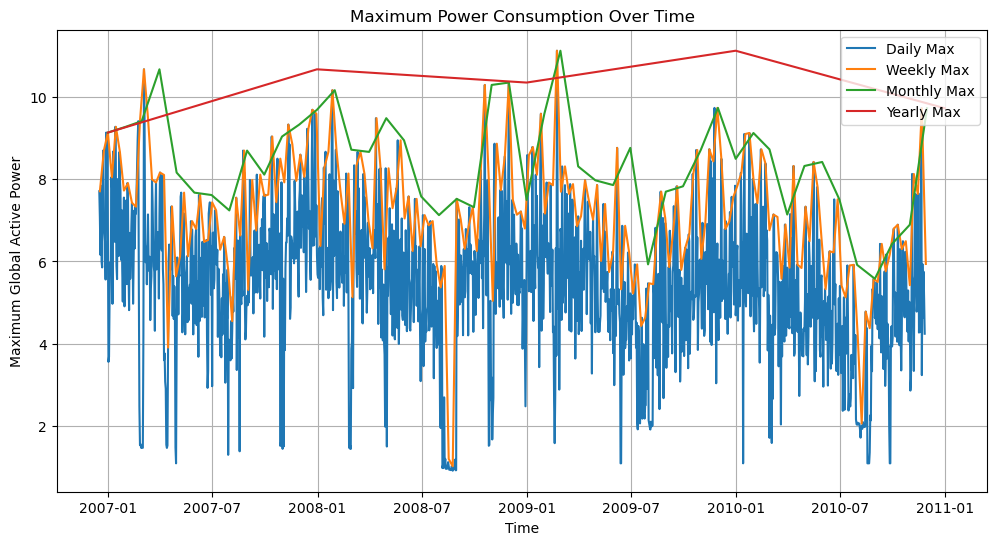

In [304]:

# Resample the data to different time frequencies and calculate the maximum for each period
daily_max = df['Global_active_power'].resample('D').max()
weekly_max = df['Global_active_power'].resample('W').max()
monthly_max = df['Global_active_power'].resample('M').max()
yearly_max = df['Global_active_power'].resample('Y').max()

# Print the results
print("Daily Maximum Power Consumption:")
print(daily_max)
print("\nWeekly Maximum Power Consumption:")
print(weekly_max)
print("\nMonthly Maximum Power Consumption:")
print(monthly_max)
print("\nYearly Maximum Power Consumption:")
print(yearly_max)

# Plot the maximum power consumption over time
plt.figure(figsize=(12, 6))
plt.plot(daily_max.index, daily_max.values, label='Daily Max')
plt.plot(weekly_max.index, weekly_max.values, label='Weekly Max')
plt.plot(monthly_max.index, monthly_max.values, label='Monthly Max')
plt.plot(yearly_max.index, yearly_max.values, label='Yearly Max')
plt.xlabel('Time')
plt.ylabel('Maximum Global Active Power')
plt.title('Maximum Power Consumption Over Time')
plt.legend()
plt.grid(True)
plt.show()

#### Daily Maximum Power Consumption
Observation: 
The maximum daily power consumption varies significantly, ranging from approximately 4.242 kW to 11.122 kW.

Time of Peak Consumption: Daily peaks are likely to occur during times of high household or industrial activity, such as:

Morning (6–9 AM): High power use for cooking, heating, or preparing for the day.

Evening (5–9 PM): Peak usage due to lighting, entertainment, and household chores.

Why? *These peaks align with human activity patterns, where demand increases during morning preparation and evening relaxation after work.

#### Weekly Maximum Power Consumption
Observation: Weekly peaks show significant variation, with some weeks reaching values as high as 9.724 kW.

Time of Peak Consumption:

Likely during weekdays (Monday-Friday) when industrial and commercial activity is at its peak.

Weekends may also show peaks depending on household activity patterns.

Why?

Weekly peaks often correlate with work schedules, industrial processes, and household routines.

Specific events (e.g., festivals or holiday preparations) may also drive consumption spikes in certain weeks.

#### Monthly Maximum Power Consumption
Observation: Monthly peaks show patterns tied to seasonal variations. For example:

The highest monthly consumption (10.670 kW) occurs in March 2007, and other high peaks occur in winter months like November or February. 

*Why? *Winter Months: Increased heating demands in colder months (November–February). 

*Summer Months: Possible spikes in regions requiring cooling (air conditioners, fans). *Seasonal Factors: Holidays, industrial cycles, and agricultural demands can also influence monthly consumption.

#### Yearly Maximum Power Consumption
Observation:
The highest annual peak (11.122 kW) occurs in 2009, with a declining trend in 2010.
Why 2009 Was the Highest?
Economic or industrial growth during 2009 may have driven higher consumption.
Specific events or seasonal extremes could have increased heating or cooling needs.
In 2010, the decline might be attributed to:
Increased energy efficiency measures.
Reduced industrial output or economic slowdowns.
Shifts to alternative energy sources or better power management.